<a href="https://colab.research.google.com/github/VidValda/Lu-k-Robot/blob/main/Follow%20Me/Vision/EDADatabase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

On this EDA, we will focus on realizing an exploration on the dataset we are going to train.

We followed this steps


1. **Select Dataset**

The Dataset choosen was selected from ([roboflow](https://universe.roboflow.com/seeed-studio-knluw/person-ab0mz/dataset/2#))

It has 4661 images of people and the main focuse of the dataset is object detection, so it also has bounding boxes.

2. **Superficial exploration**

A superfitial exploration of the Dataset reveal us that all the images are of the same size, also the luminosity is the same on several of the images, so data augmentation is used.

3. **Data Augmentation**

For the data augmentation the size of some images were changed, and also the brightness, so the final model can perform under different cameras and light conditions.

The values of the data augmentation is:
Crop: 0% Minimum Zoom, 20% Maximum Zoom
Exposure: Between -15% and +15%

4. **New Dataset**

The new created Dataset, can be seen on [roboflow](https://universe.roboflow.com/people-follower-detector/follow-me-robot) as a custom project and now it has 12156 on which train-valid-test is 93%/6%/1%


In [ ]:
!pip install roboflow

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="X5nYp9c9V5t9kpFvVDAu")
project = rf.workspace("people-follower-detector").project("follow-me-robot")
dataset = project.version(1).download("darknet")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Follow-me-robot-1 in darknet:: 100%|██████████| 24320/24320 [00:09<00:00, 2536.92it/s]


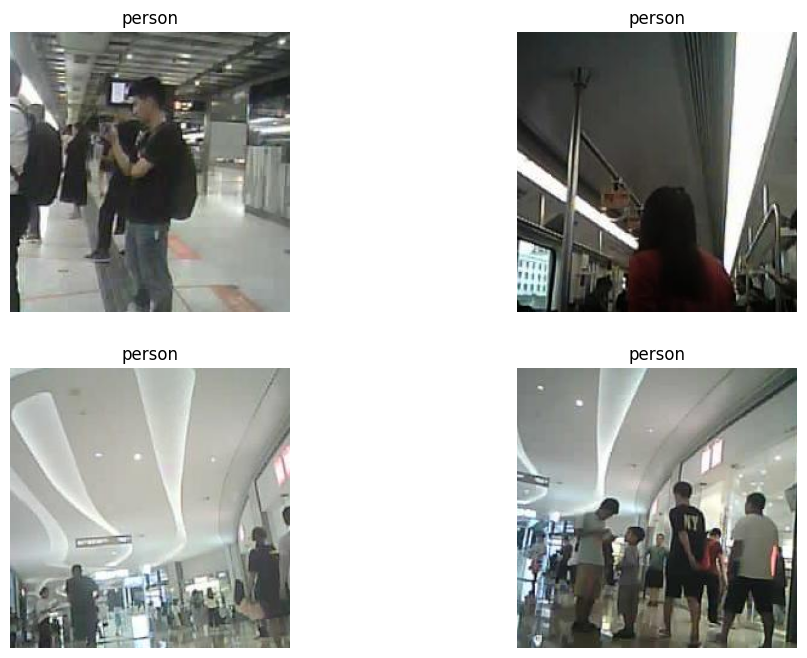

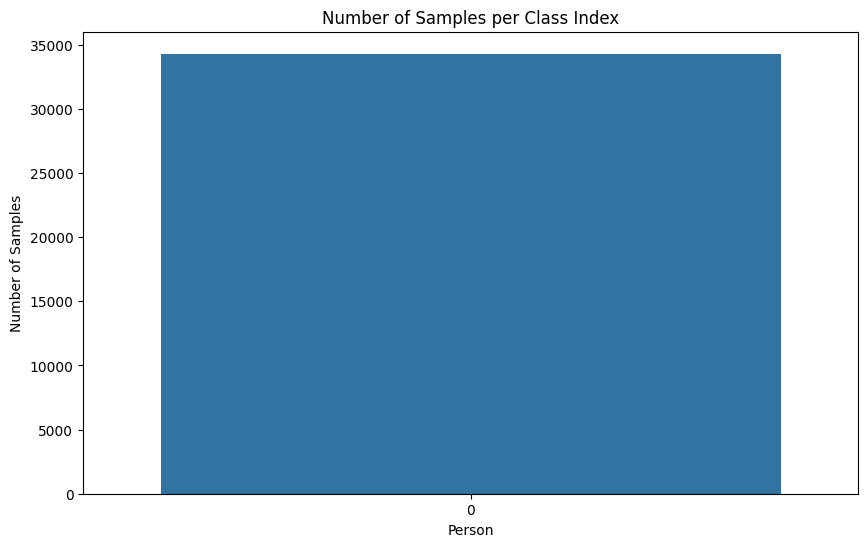

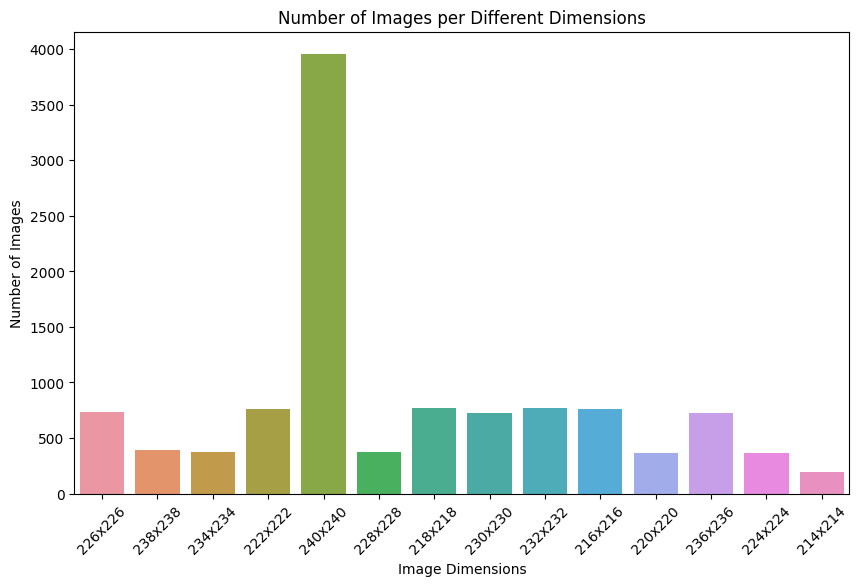

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_dir = "/content/Follow-me-robot-1/train"

with open(os.path.join(data_dir, "_darknet.labels"), "r") as label_file:
    categories = [line.strip() for line in label_file.readlines()]


sample_counts = {i: 0 for i in range(len(categories))}

image_files = []

for label_file in os.listdir(data_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(data_dir, label_file), "r") as f:
            lines = f.readlines()
            for line in lines:
                class_index = int(line.split(" ")[0])
                sample_counts[class_index] += 1

                image_filename = label_file.replace(".txt", ".jpg")
                image_files.append(image_filename)

# Randomly select 4 images to display
selected_images = random.sample(image_files, 4)

# Visualization of the selected samples
plt.figure(figsize=(12, 8))
for i, image_filename in enumerate(selected_images):
    image_path = os.path.join(data_dir, image_filename)
    sample_image = plt.imread(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(sample_image)
    plt.title(categories[0])
    plt.axis('off')
plt.show()

# Bar chart with the number of samples per class index
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sample_counts.keys()), y=list(sample_counts.values()))
plt.title("Number of Samples per Class Index")
plt.xlabel("Person")
plt.ylabel("Number of Samples")
plt.show()

# Bar chart with the number of images per different dimension
image_dimensions = {}
for image_file in os.listdir(data_dir):
    if image_file.endswith(".jpg"):
        image_path = os.path.join(data_dir, image_file)
        image = plt.imread(image_path)
        dimensions = f"{image.shape[0]}x{image.shape[1]}"
        if dimensions in image_dimensions:
            image_dimensions[dimensions] += 1
        else:
            image_dimensions[dimensions] = 1

dimensions_df = pd.DataFrame(list(image_dimensions.items()), columns=["Dimensions", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Dimensions", y="Count", data=dimensions_df)
plt.title("Number of Images per Different Dimensions")
plt.xlabel("Image Dimensions")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


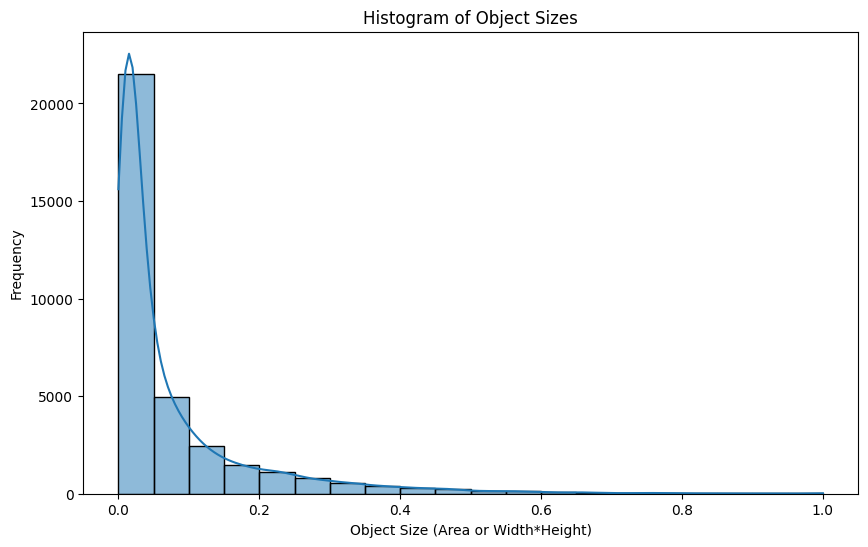

In [ ]:

data_dir = "/content/Follow-me-robot-1/train"

object_sizes = []

for label_file in os.listdir(data_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(data_dir, label_file), "r") as f:
            lines = f.readlines()
            for line in lines:
                parts = line.split(" ")
                class_index = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])

                # Calculate object size (e.g., area or width*height)
                object_area = width * height
                object_sizes.append(object_area)

# Plot a histogram of object sizes
plt.figure(figsize=(10, 6))
sns.histplot(object_sizes, bins=20, kde=True)
plt.title("Histogram of Object Sizes")
plt.xlabel("Object Size (Area or Width*Height)")
plt.ylabel("Frequency")
plt.show()
